# We covered at lot this Term
* How to write Deep Learning Models with Keras
* How to used Neural Networks on Structued Data
* How Image data is stored and manipulated
* How to use CNNs

## Today we will continue with our cancer screening example, using models written by other people






# Programming Powerup - Keras Sequential

So far we've been using Keras's Functional API
* It is more flexible
* It isn't as clean
There is another frequently used method of writing models Sequential





In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np
import openslide

## A model in the functional API

In [7]:
cnn_input=tf.keras.layers.Input( shape=(96,96,3) ) # Shape here does not including the batch size 
cnn_layer1=tf.keras.layers.Convolution2D(64, (2,2),strides=2,padding='same')(cnn_input) 
cnn_activation=tf.keras.layers.LeakyReLU()(cnn_layer1) 
cnn_activation=tf.keras.layers.Dropout(0.3)(cnn_activation) 

cnn_layer2=tf.keras.layers.Convolution2D(126, (2,2),strides=2,padding='same')(cnn_activation) 
cnn_activation=tf.keras.layers.LeakyReLU()(cnn_layer2) 
cnn_activation=tf.keras.layers.Dropout(0.3)(cnn_activation) 

cnn_layer3=tf.keras.layers.Convolution2D(256, (2,2),strides=2,padding='same')(cnn_activation) 
cnn_activation=tf.keras.layers.LeakyReLU()(cnn_layer3) 
cnn_activation=tf.keras.layers.Dropout(0.3)(cnn_activation) 


flat=tf.keras.layers.Flatten()(cnn_activation) 

drop=tf.keras.layers.Dropout(0.3)(flat) 

dense_layer=tf.keras.layers.Dense(1)(drop) 
output=tf.keras.layers.Activation('sigmoid')(dense_layer)

model=tf.keras.models.Model([cnn_input],[output])
model.summary()

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

2022-03-04 09:42:28.375106: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-03-04 09:42:28.375154: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (n225): /proc/driver/nvidia/version does not exist
2022-03-04 09:42:28.375619: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 64)        832       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 48, 48, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 126)       32382     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 24, 24, 126)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 126)       0     

In [8]:

model = tf.keras.models.Sequential()#add model layers
model.add(tf.keras.layers.Convolution2D(64, (2,2),strides=2,padding='same',input_shape=(96,96,3)))
model.add(tf.keras.layers.LeakyReLU()) 
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(tf.keras.layers.Convolution2D(126, (2,2),strides=2,padding='same'))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Convolution2D(256, (2,2),strides=2,padding='same'))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 48, 48, 64)        832       
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 48, 48, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 126)       32382     
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 24, 24, 126)       0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 24, 24, 126)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 256)       1

## Both of the above create the same model and can use the same weights

In [9]:
model.load_weights('/projects/bgmp/shared/2019_ML_workshop/datasets/pcamv1/cnn_2.h5')

# Using other models for your problem

# Example VGG16

<img src=https://miro.medium.com/max/1400/0*xurYLT8UBpFKPNQA>

This model was trained on ImageNet (http://www.image-net.org/)
* Classification of a thousand of different objects, and trained with Millions of images
* We want to take all those pre-trained weights and use them in our cancer example


Remember from the models we wrote
   * We have a stack of Convolutional Layers
   * Flatten Layer
   * Dense Layer(s) to make predictions

Since the classification is only at the end, we can just remove it
   * In the figure above these are all the layers in green
   * We can replace it with new layers

You'll hear this called **transfer learning**, because we're using the features learned from ImageNet to do classification on our data.

**Important** we've been scaling our images from 0-1 by dividing by 255. This isn't the way it's always done, and if you don't use the right image pre-processing functions for the model you're using you might get meaningful looking results but ones that are very sub-optimal.






## The Code

In [7]:
#pre_trained=tf.keras.applications.inception_v3.InceptionV3(include_top=False, weights='imagenet',input_tensor=None, input_shape=(96,96,3), pooling=None)

#Load a pretrained model

#set include_top to false this removes the dense layers at the end
pre_trained=tf.keras.applications.vgg16.VGG16(include_top=False, weights='imagenet',input_tensor=None, input_shape=(96,96,3), pooling=None)
preprocessing=tf.keras.applications.vgg16.preprocess_input


# fix all these layers so we don't train them right away
for l in pre_trained.layers:
    l.trainable=False


# Add our own new Dense Layers    
flat=tf.keras.layers.Flatten()(pre_trained.output)
top=tf.keras.layers.Dense(256)(flat)
top=tf.keras.layers.LeakyReLU()(top)
top=tf.keras.layers.Dropout(0.3)(top)

classification=tf.keras.layers.Dense(1,activation='sigmoid')(top)

# Model/compile like before


model=tf.keras.models.Model([pre_trained.input],classification)
model.summary()
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(lr=1e-4),metrics=['accuracy'])

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 48, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 48, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 48, 48, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 24, 24, 128)       0   

/packages/miniconda/20190102/envs/jupyterlab-tf-pyt-20211020/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


We'll make generators like before but now using the preprocessing function

In [8]:
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
            preprocessing_function=preprocessing,
            width_shift_range=0,  # randomly shift images horizontally
            height_shift_range=0,  # randomly shift images vertically 
            horizontal_flip=True,  # randomly flip images
            vertical_flip=True,
            shear_range=1,
            zoom_range=.05,
            rotation_range=15                           
            )  # randomly flip images

train_generator=data_gen.flow_from_directory('/projects/bgmp/shared/2019_ML_workshop/datasets/pcamv1/images/train',
                                            target_size=(96,96), 
                                            color_mode='rgb', 
                                            classes=['normal','tumor'],
                                            class_mode='binary',
                                            batch_size=32,
                                            shuffle=True)

develop_gen = tf.keras.preprocessing.image.ImageDataGenerator(
            preprocessing_function=preprocessing,
            width_shift_range=0,  # don't do anything but preprocess
            height_shift_range=0,  
            horizontal_flip=False,  
            vertical_flip=False,
            shear_range=0,
            zoom_range=.00,
            rotation_range=0                          
            )  # randomly flip images

develop_generator=develop_gen.flow_from_directory('/projects/bgmp/shared/2019_ML_workshop/datasets/pcamv1/images/develop',
                                            target_size=(96,96), 
                                            color_mode='rgb', 
                                            classes=['normal','tumor'],
                                            class_mode='binary',
                                            batch_size=32,
                                            shuffle=False)

test_generator=develop_gen.flow_from_directory('/projects/bgmp/shared/2019_ML_workshop/datasets/pcamv1/images/test',
                                            target_size=(96,96), 
                                            color_mode='rgb', 
                                            classes=['normal','tumor'],
                                            class_mode='binary',
                                            batch_size=32,
                                            shuffle=False)
     




Found 275278 images belonging to 2 classes.
Found 34302 images belonging to 2 classes.
Found 34297 images belonging to 2 classes.


In [9]:
try_fit = False

if try_fit:
    history=model.fit_generator(train_generator,steps_per_epoch=1000,epochs=5,validation_data=develop_generator,validation_steps=100)


In [10]:
if try_fit:
    for l in pre_trained.layers:
        l.trainable=True
    
    # You must! recompile after freezing layers
    model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(lr=1e-4),metrics=['accuracy'])

    model.fit_generator(train_generator,steps_per_epoch=1000,epochs=10,validation_data=develop_generator)


In [11]:
if not try_fit:
    model.load_weights('/projects/bgmp/shared/2019_ML_workshop/VGG16.png').expect_partial()

/packages/miniconda/20190102/envs/jupyterlab-tf-pyt-20211020/lib/python3.9/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '
2022-03-03 19:48:04.466201: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


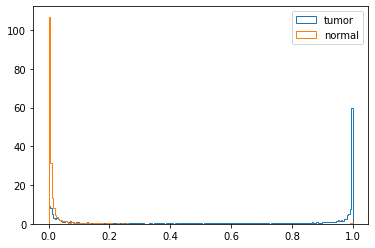

In [12]:
y_true=np.squeeze(develop_generator.classes)
y_pred=np.squeeze(model.predict_generator(develop_generator))

fine=[pred for pred,truth in zip(y_pred,y_true) if not truth  ]
tumor=[pred for pred,truth in zip(y_pred,y_true) if  truth  ]

plt.hist(tumor,range=(0,1),bins=200,density=True,histtype='step',label='tumor')
plt.hist(fine,range=(0,1),bins=200,density=True,histtype='step',label='normal')
plt.legend()
plt.show()

In [13]:

def scan_image(image_file,batch_size,x_range,y_range,preprocessing_function):
    slide_image=openslide.OpenSlide(image_file)
    res_x,res_y=slide_image.level_dimensions[2]
    
    coord_x,coord_y=slide_image.level_dimensions[0] 
    #This is factor we need to scale the pixels at resolution 2 to the coordinates in resolution 0

    sfactor_x=coord_x/res_x  
    sfactor_y=coord_y/res_y 
    
    batch=[]
    index=0
    for x in range(x_range[0]//4,x_range[1]//4,32):
        for y in range(y_range[0]//4,y_range[1]//4,32):
            image=np.asarray(slide_image.read_region( (int(x*sfactor_x),int(y*sfactor_y)),2,(96,96)  ))
            batch.append( preprocessing_function(np.expand_dims(image[:,:,0:3],0))  )                                

            if len(batch)==batch_size:
                yield(np.concatenate(batch,0))
                batch=[]


/packages/miniconda/20190102/envs/jupyterlab-tf-pyt-20211020/lib/python3.9/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


[[0.00156945]
 [0.00163612]
 [0.00165725]
 ...
 [0.00464085]
 [0.00467288]
 [0.00478393]]


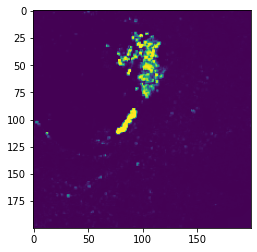

In [14]:
batch_size=10

width=6400
height=6400

x_start=60000
y_start=120000

x_stop=x_start+width*4
y_stop=y_start+height*4



x_range=[x_start,x_stop]
y_range=[y_start,y_stop]

n_predictions=width//32*height//32
steps=n_predictions//batch_size

generator=scan_image('/projects/bgmp/shared/2019_ML_workshop/datasets/pcamv1/tumor_001.tif',batch_size,x_range,y_range,preprocessing)
steps=n_predictions//batch_size

output_scan=model.predict_generator(generator,steps)
output_map=np.zeros((height//32,width//32))
print(output_scan)
for index,v in enumerate(output_scan):
    
    y=index%(width//32)
    x=index//(width//32)
    output_map[y,x]=v
    

    

plt.imshow(output_map)
plt.show()

# Full Slides 

This slide with a tumor

<img src="../assets/full_slide_scan_vgg16.png">

A slide with no tumor

<img src="../assets/full_slide_scan_vgg16_normal.png">

## Looking a lot better

Still some false positives along the slide/cell edges
* We could try to harvest more of that data
* Or we could institute a policy
    * Don't use the model for cell on the edge of a slide
* A human will make the diagnosis and the better the model the faster and more reliable it will be
* How did our model do?

# Where is the tumor?

In [15]:
import xml.etree.ElementTree as ET
tree = ET.parse('/projects/bgmp/shared/2019_ML_workshop/datasets/pcamv1/tumor_001.xml')
root = tree.getroot()
tiff_file='/projects/bgmp/shared/2019_ML_workshop/datasets/pcamv1/tumor_001.tif'
slide_image=openslide.OpenSlide(tiff_file)
tumor_coords=[(float(el.attrib['X']),float(el.attrib['Y'])) for el in root.findall('Annotations/Annotation/Coordinates/Coordinate')]

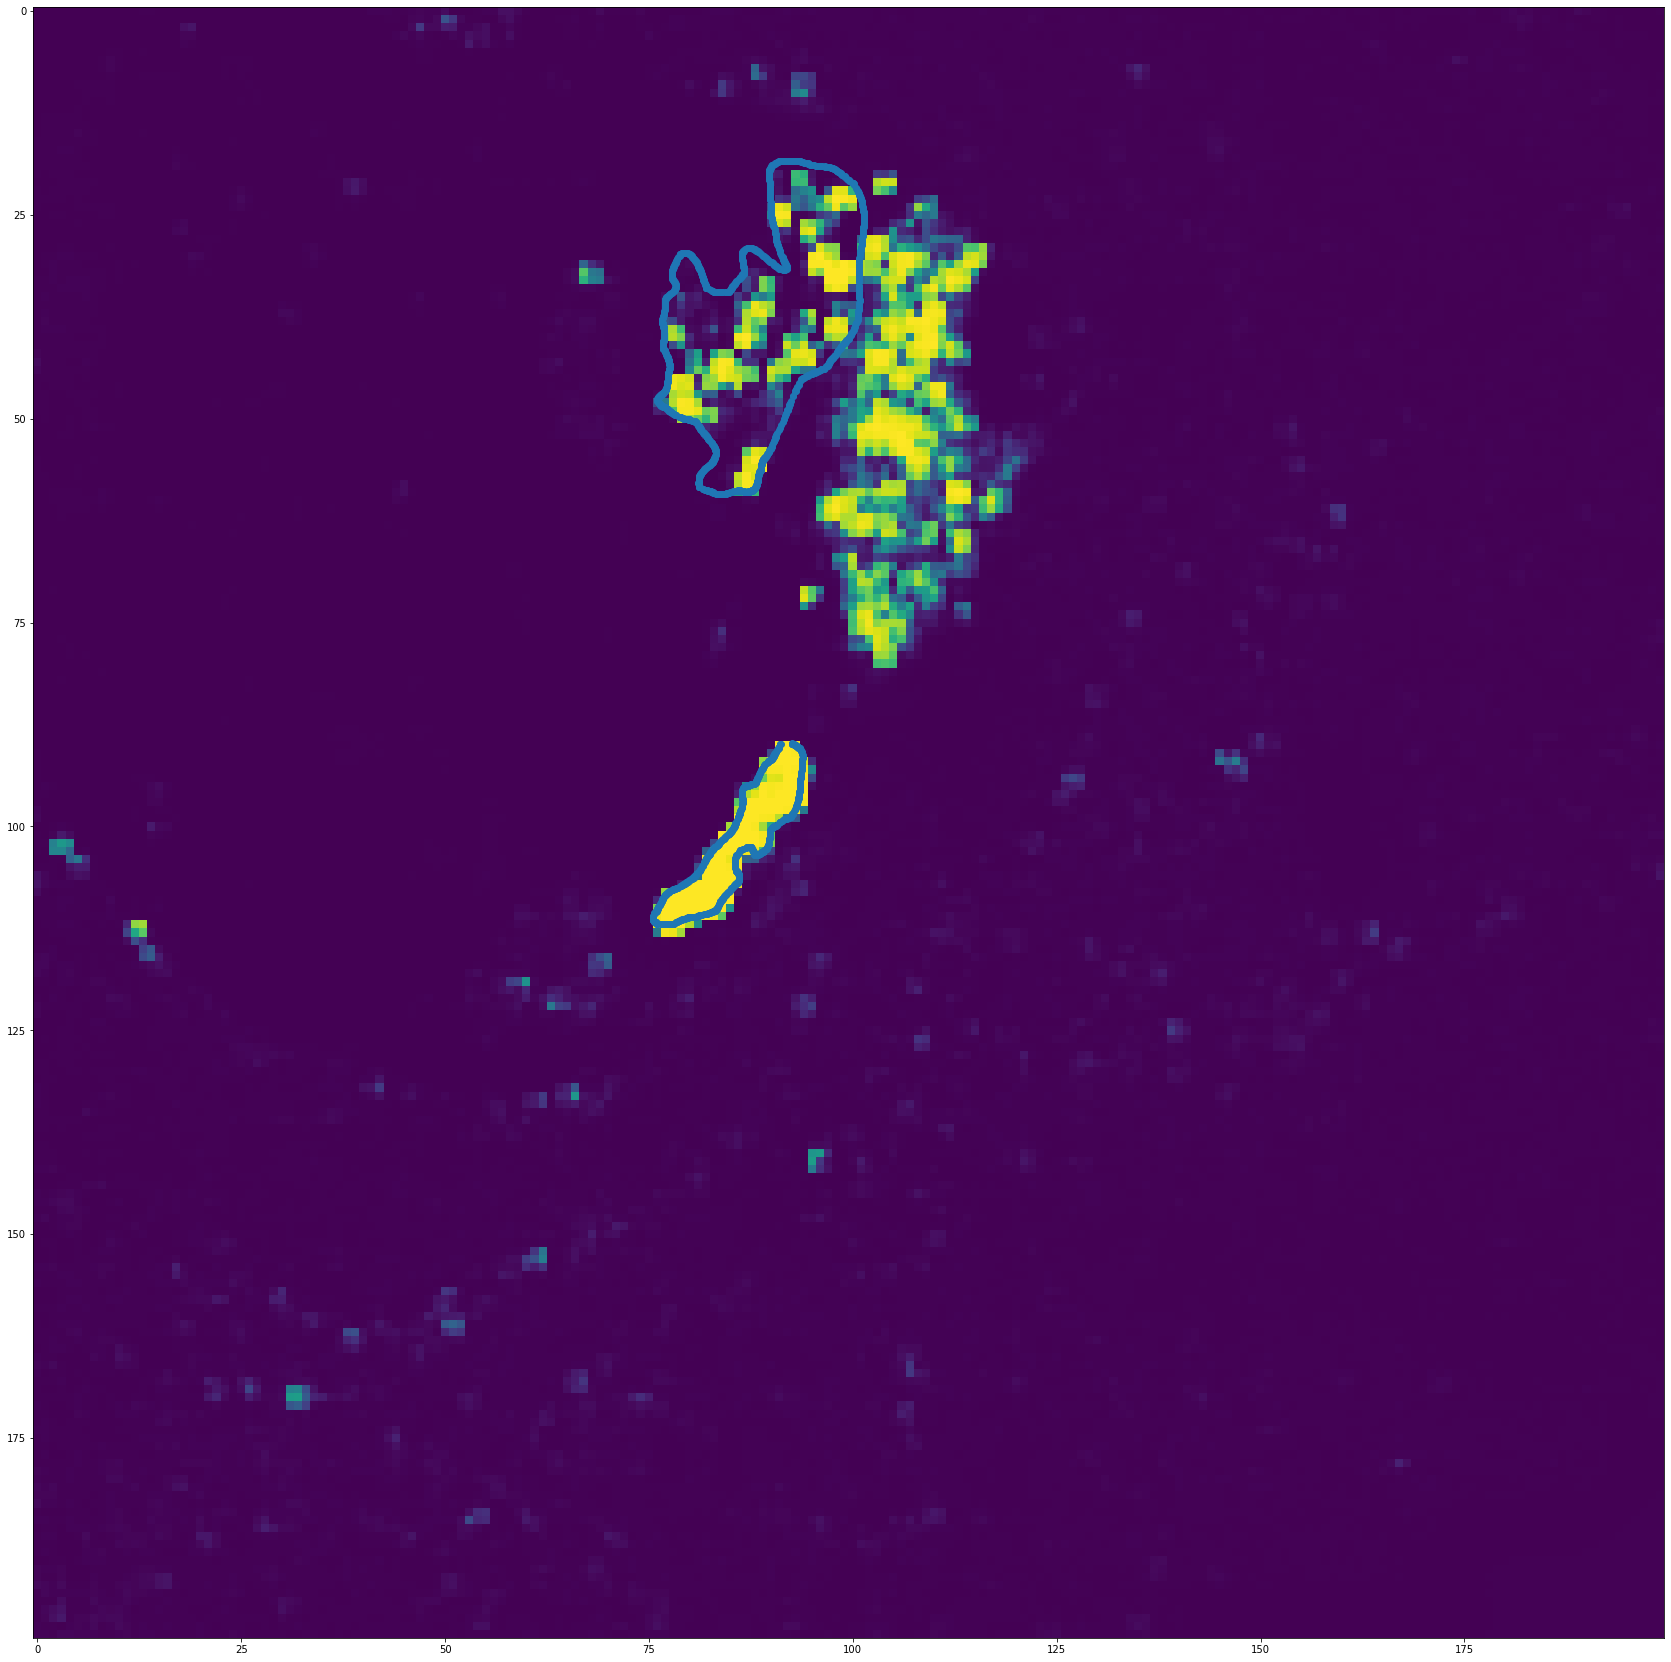

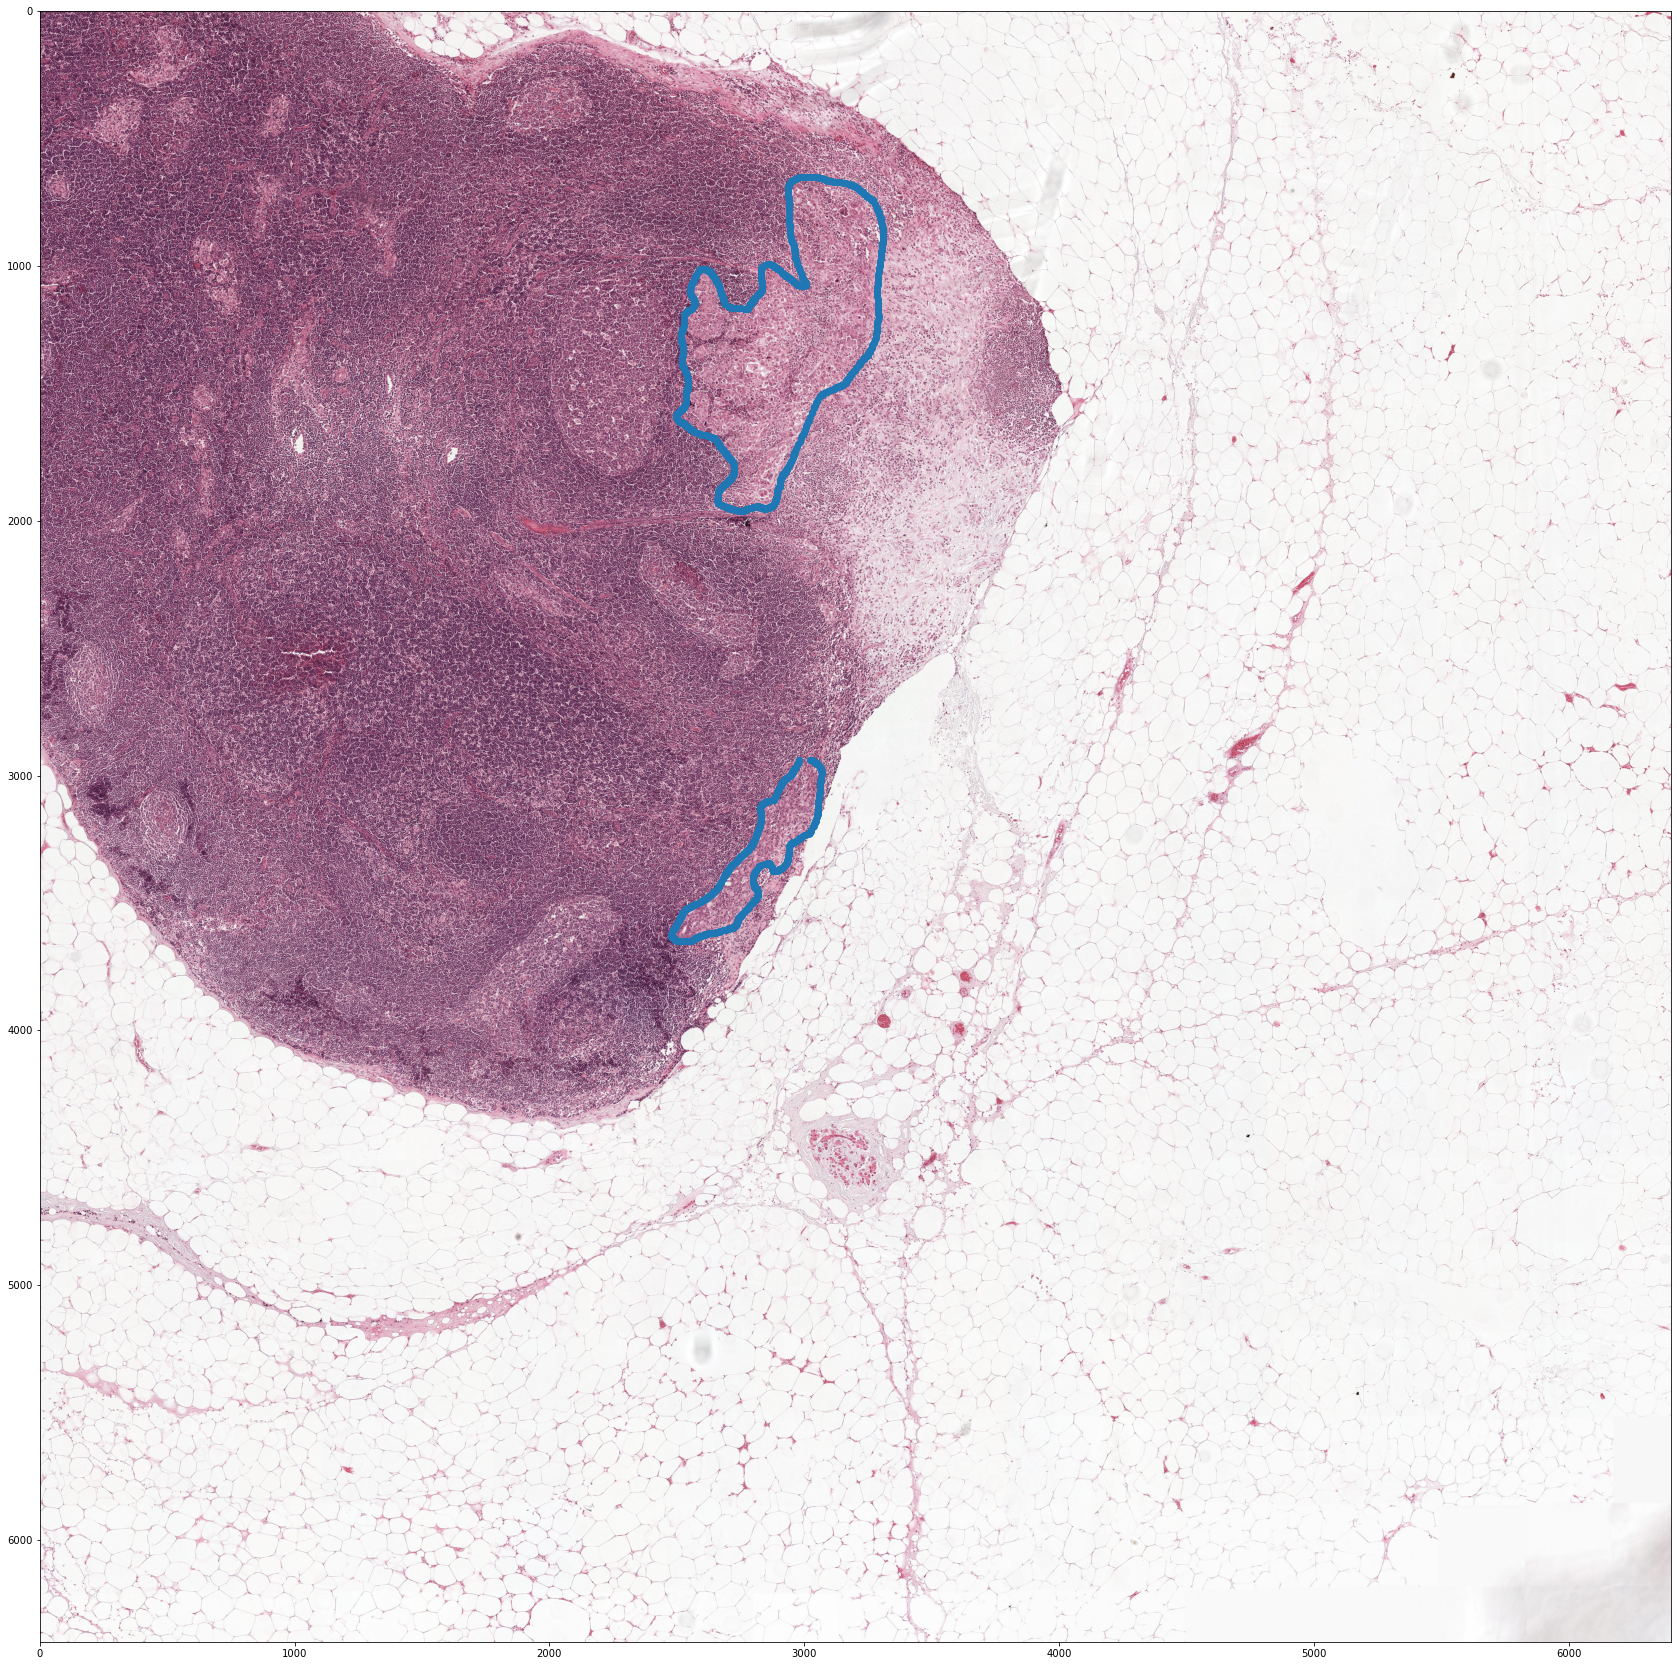

In [16]:
tumor_x=[(x-x_start)/4./32.-2 for x,y in tumor_coords]
tumor_y=[(y-y_start)/4./32.-2 for x,y in tumor_coords]
f=plt.figure(figsize=(30,30))
plt.imshow(output_map)
plt.scatter(tumor_x,tumor_y)

f=plt.figure(figsize=(30,30))
plt.imshow(slide_image.read_region( (x_start,y_start),2,(height,width)))
tumor_x=[(x-x_start)/4. for x,y in tumor_coords]
tumor_y=[(y-y_start)/4. for x,y in tumor_coords]
plt.scatter(tumor_x,tumor_y)
plt.show()



# We did highlight both tumors, but we also highlighed a different area of cells

* Group Question, how would you try and fix this issue?




# Can you do even better?

Give it a try with a different pretrained model

# Summary for using existing models

* Be careful not to 'blow up' existing well trained weights
* Train the dense layers first classifier
* Fine-Tune  other layers (use small learning rates)


# Where to go next - Methods

## [U-Nets](https://arxiv.org/abs/1505.04597) - Pixel Labeling

Example for  (CT) images - [Source](https://www.frontiersin.org/articles/10.3389/fgene.2019.01110/full)
![image.png](https://www.frontiersin.org/files/Articles/492928/fgene-10-01110-HTML-r2/image_m/fgene-10-01110-g001.jpg)

## Object Detection 
Malaria Detection - [Source](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-021-04036-4)

![image.png](https://media.springernature.com/lw685/springer-static/image/art%3A10.1186%2Fs12859-021-04036-4/MediaObjects/12859_2021_4036_Fig3_HTML.png?as=webp)

# Handy Tools

[Ilastick](https://www.ilastik.org/) -  the interactive learning and segmentation toolkit
![image.jpg](https://www.ilastik.org/gallery/full/Figure-2-d.jpg)


[QuPath](https://qupath.github.io/) - Quantitative Pathology & Bioimage Analysis

![image.jpg](https://qupath.github.io/images/qupath_v0.2.0_larger.jpg)